# Techniques to handle categorical missing values
#### 1) Frequent Category Imputation
#### 2) Adding a Variable to capture Nan

# Technique 1) Frequent Category Imputation

In [2]:
import pandas as pd
df = pd.read_csv('House Prices_train.csv')
# Download Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#cant read all 81 columns in above dataframe. So,
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# lets focus on 4 particular columns / features
df = pd.read_csv('House Prices_train.csv',usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df
# 'BsmtQual', 'FireplaceQu', 'GarageType' are Categorical features
# 'SalePrice' is dependent feature

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [5]:
#find number of missing values
df.isnull().sum().sort_values(ascending=True) #sort the values

SalePrice        0
BsmtQual        37
GarageType      81
FireplaceQu    690
dtype: int64

In [6]:
#find percentage of missing values
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [7]:
#sort the values
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Compute the frequency with every feature

In [8]:
#count the frequent features in a column - Method 'value_counts()'
df['BsmtQual'].value_counts()
# order is descending

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [9]:
#count the frequent features in a column  - Method "groupby"
df.groupby(['BsmtQual'])['BsmtQual'].count()
# no particular order

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [10]:
#arrange in Ascending order
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=True)

BsmtQual
Fa     35
Ex    121
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [11]:
#arrange in Descending order
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

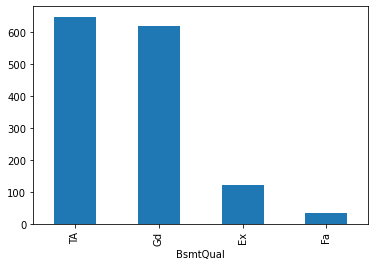

In [12]:
#plot the counts / frequency
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar() # Method "groupby"

# "Fa" has minimum and "TA" has maximum count

<AxesSubplot:>

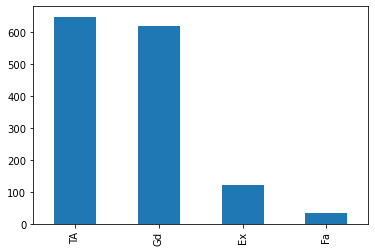

In [13]:
df['BsmtQual'].value_counts().plot.bar() #Method 'value_counts()'

<AxesSubplot:>

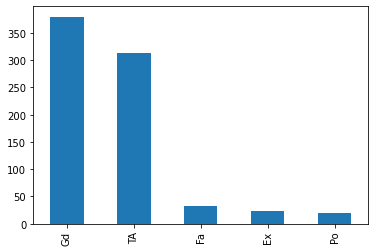

In [14]:
df['FireplaceQu'].value_counts().plot.bar() #Method 'value_counts()', feature 2 'FireplaceQu'

<AxesSubplot:>

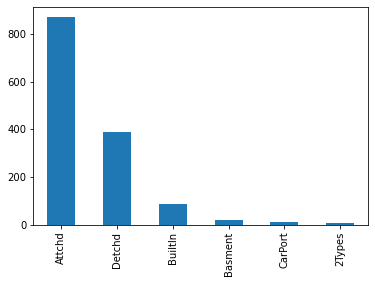

In [15]:
df['GarageType'].value_counts().plot.bar() #Method 'value_counts()', feature 3 'GarageType'

In [16]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [17]:
df['GarageType'].value_counts().index # List of all indexes

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [18]:
df['GarageType'].value_counts()[0] # maximum count

870

In [19]:
df['GarageType'].value_counts().index[0] # Index of maximum count

'Attchd'

In [20]:
df['GarageType'].mode()[0] # Index of maximum count ~ Mode

'Attchd'

# Replace / Impute Function

In [21]:
def impute_nan(df,variable):
# replace 'GarageType' with variable in previous code: df['GarageType'].value_counts().index[0]
    most_frequent_category = df[variable].value_counts().index[0] #pick up most frquent categories in any variable / column
    df[variable].fillna(most_frequent_category,inplace=True)   #Fill NaN with most frequent category

In [22]:
#excute the above defined function in For Loop
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df,feature)

##### earlier the features had several Nan values
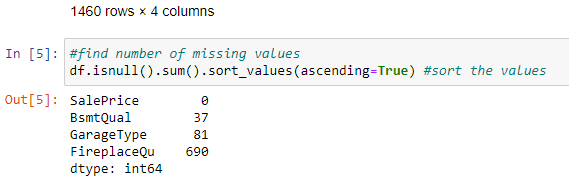

In [23]:
# but now, all Nan values are replaced with most frequent value / Mode
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Advantages
1) Easy to implement

2) Faster way to Implement
# DisAdvantages
1) It may lead to over-representation, of frquent labels, in the case of several NaNs

2) It distorts the relation of the most frequent label


In [25]:
# if  2 or multiple values have highest frquency ~ mode
# then you may take anyone of them